In [100]:
import requests
import pandas as pd
import json
import numpy as np
import requests
import bs4
from IPython.display import display, Image
UFC_ALL_EVENTS_API = 'http://ufc-data-api.ufc.com/api/v3/us/events'
FIGHTS_API_SUFFIX = '/fights'
MENU_HEADER = '===============MENU================='
OPTION_1 = '1. Display fighter stats by name'
OPTION_2 = '2. Display top N fighters per weight class'
OPTION_3 = '3. Upcoming fight predictions'
OPTION_QUIT = 'q. Quit'
WEIGHT_CLASSES = ['105 lbs.', '115 lbs.', '125 lbs.',
                  '135 lbs.', '145 lbs.', '155 lbs.', '170 lbs.',
                  '185 lbs.', '205 lbs.', '265 lbs.']

## Only run the next code to download all fighters' data from UFC
### takes around 10-15 mins

In [7]:

fighter1_stats = ['fighter1_first_name', 'fighter1_last_name', 'fighter1_nickname', \
                  'fighter1_wins', 'fighter1_losses', 'fighter1_draws', 'fighter1_averagefighttime', \
                  'fighter1_averagefighttime_seconds', 'fighter1_kdaverage', 'fighter1_slpm','fighter1_strikingaccuracy',\
                  'fighter1_sapm','fighter1_strikingdefense','fighter1_takedownaverage','fighter1_takedownaccuracy',\
                  'fighter1_takedowndefense','fighter1_submissionsaverage', 'fighter1height', 'fighter1weight', 'fighter1reach']
fighter2_stats = ['fighter2_first_name', 'fighter2_last_name', 'fighter2_nickname', \
                  'fighter2_wins', 'fighter2_losses', 'fighter2_draws', 'fighter2_averagefighttime', \
                  'fighter2_averagefighttime_seconds', 'fighter2_kdaverage', 'fighter2_slpm','fighter2_strikingaccuracy',\
                  'fighter2_sapm','fighter2_strikingdefense','fighter2_takedownaverage','fighter2_takedownaccuracy',\
                  'fighter2_takedowndefense','fighter2_submissionsaverage','fighter2height', 'fighter2weight', 'fighter2reach']

# count = 3
res = requests.get(UFC_ALL_EVENTS_API)
all_events = json.loads(res.content)
all_events_df = pd.read_json(json.dumps(all_events))
df = pd.DataFrame()
for event_id in all_events_df['id']:
    res = requests.get(UFC_ALL_EVENTS_API + '/' + (str)(event_id) + FIGHTS_API_SUFFIX)
    data = json.loads(res.content)
    df = df.append(pd.read_json(json.dumps(data)))
#     if count == 0:
#         break
#     else:
#         count = count - 1

fighter1_stats_df = df.loc[:,fighter1_stats]
fighter1_stats_df = fighter1_stats_df.rename(columns={'fighter1_first_name':'fighter_first_name', \
                                                      'fighter1_last_name':'fighter_last_name',\
                                                      'fighter1_nickname':'fighter_nickname', \
                                                      'fighter1_wins':'fighter_wins', \
                                                      'fighter1_losses':'fighter_losses', \
                                                      'fighter1_draws':'fighter_draws',\
                                                      'fighter1_averagefighttime':'fighter_averagefighttime', \
                                                      'fighter1_averagefighttime_seconds':'fighter_averagefighttime_seconds',\
                                                      'fighter1_kdaverage':'fighter_kdaverage', \
                                                      'fighter1_slpm':'fighter_slpm',\
                                                      'fighter1_strikingaccuracy':'fighter_strikingaccuracy',\
                                                      'fighter1_sapm':'fighter_sapm',\
                                                      'fighter1_strikingdefense':'fighter_strikingdefense',\
                                                      'fighter1_takedownaverage':'fighter_takedownaverage',\
                                                      'fighter1_takedownaccuracy':'fighter_takedownaccuracy',\
                                                      'fighter1_takedowndefense':'fighter_takedowndefense',\
                                                      'fighter1_submissionsaverage':'fighter_submissionsaverage',\
                                                      'fighter1height':'fighter_height', \
                                                      'fighter1weight':'fighter_weight', \
                                                      'fighter1reach' :'fighter_reach'})

fighter2_stats_df = df.loc[:, fighter2_stats]
fighter2_stats_df = fighter2_stats_df.rename(columns={'fighter2_first_name':'fighter_first_name', \
                                                      'fighter2_last_name':'fighter_last_name',\
                                                      'fighter2_nickname':'fighter_nickname', \
                                                      'fighter2_wins':'fighter_wins', \
                                                      'fighter2_losses':'fighter_losses', \
                                                      'fighter2_draws':'fighter_draws',\
                                                      'fighter2_averagefighttime':'fighter_averagefighttime', \
                                                      'fighter2_averagefighttime_seconds':'fighter_averagefighttime_seconds',\
                                                      'fighter2_kdaverage':'fighter_kdaverage', \
                                                      'fighter2_slpm':'fighter_slpm',\
                                                      'fighter2_strikingaccuracy':'fighter_strikingaccuracy',\
                                                      'fighter2_sapm':'fighter_sapm',\
                                                      'fighter2_strikingdefense':'fighter_strikingdefense',\
                                                      'fighter2_takedownaverage':'fighter_takedownaverage',\
                                                      'fighter2_takedownaccuracy':'fighter_takedownaccuracy',\
                                                      'fighter2_takedowndefense':'fighter_takedowndefense',\
                                                      'fighter2_submissionsaverage':'fighter_submissionsaverage',\
                                                      'fighter2height':'fighter_height', \
                                                      'fighter2weight':'fighter_weight', \
                                                      'fighter2reach' :'fighter_reach'})

fighter_stats_df = pd.concat([fighter1_stats_df, fighter2_stats_df]).reset_index(drop=True)
# print('Fighter count before dedup:', len(fighter_stats_df.index))
fighter_stats_df_dedup = fighter_stats_df.drop_duplicates(['fighter_first_name', 'fighter_last_name', 'fighter_nickname'], keep='last')
# print('Fighter count after dedup:', len(fighter_stats_df_dedup.index))
total_fights = fighter_stats_df_dedup['fighter_wins'] + \
               fighter_stats_df_dedup['fighter_losses'] +\
               fighter_stats_df_dedup['fighter_draws']
fighter_stats_df_dedup['total_fights'] = total_fights        
fighter_stats_df_dedup['win %'] = (fighter_stats_df_dedup['fighter_wins']) / total_fights
fighter_stats_df_dedup.to_csv('fighters.csv',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [111]:
import numpy as np
MINIMUM_FIGHTS_TO_HAVE = 10
for weight_class in fighter_stats_df_dedup['fighter_weight'].unique():
    fighters_in_weight_class = fighter_stats_df_dedup[fighter_stats_df_dedup['fighter_weight'] == weight_class]
#     print(fighters_in_weight_class[['fighter_weight', 'win %']])
    # Rank them by win percentage
    fighters_in_weight_class = fighters_in_weight_class[fighters_in_weight_class.total_fights >= MINIMUM_FIGHTS_TO_HAVE]
    fighters_in_weight_class = fighters_in_weight_class.sort_values(by=['win %', 'total_fights'],ascending=[False, False])
    top_n_fighters = fighters_in_weight_class.loc[:, 
        ['fighter_first_name', 'fighter_last_name', 'total_fights', 'fighter_weight','win %']].head()
    print(top_n_fighters.to_csv(index=False))
    print('==================================================================================================================')

fighter_first_name,fighter_last_name,total_fights,fighter_weight,win %
Israel,Adesanya,12.0,185,1.0
Trevin,Giles,11.0,185,1.0
Paulo,Costa,11.0,185,1.0
Oskar,Piechota,12.0,185,0.9166666666666666
Alessio,Di Chirico,12.0,185,0.9166666666666666

fighter_first_name,fighter_last_name,total_fights,fighter_weight,win %
Joanna,Jedrzejczyk,15.0,115,0.9333333333333332
Viviane,Pereira,14.0,115,0.9285714285714286
Polyana,Viana,11.0,115,0.9090909090909092
Alexa,Grasso,11.0,115,0.9090909090909092
Claudia,Gadelha,18.0,115,0.8333333333333334

fighter_first_name,fighter_last_name,total_fights,fighter_weight,win %
Deiveson,Figueiredo,14.0,125,1.0
Naoki,Inoue,11.0,125,1.0
Magomed,Bibulatov,15.0,125,0.9333333333333332
Jarred,Brooks,14.0,125,0.9285714285714286
Joseph,Morales,10.0,125,0.9

fighter_first_name,fighter_last_name,total_fights,fighter_weight,win %
Brian,Ortega,13.0,145,1.0
Cody,Stamann,17.0,145,0.9411764705882352
Zabit,Magomedsharipov,15.0,145,0.9333333333333332
Arnold,Allen,13.0,145,0.9230769230

## Top 10 fighter per weight class

In [75]:
'''
join UFC data with fightmetric data
to get top M fighters in each weight class
'''

MINIMUM_FIGHTS_TO_HAVE = 10
TOP_N = 10

#Loading Data
fighter_stats_fm = pd.read_excel('./fighter_stats.xlsx')
# fighter_stats_fm.head()
fighter_stats_fm.rename(columns={'Ht.': 'height', 'Wt.': 'weight'}, inplace=True)

fighter_stats_df_dedup = pd.read_csv('fighters.csv', encoding='ISO-8859-1')
all_df = pd.merge(fighter_stats_fm, fighter_stats_df_dedup, how='left', left_on = ['First', 'Last'], right_on = ['fighter_first_name', 'fighter_last_name'])
all_df.head()
for weight_class in all_df['weight'].unique():
    fighters_in_weight_class = all_df[all_df['weight'] == weight_class]
#     print(fighters_in_weight_class[['fighter_weight', 'win %']])
    # Rank them by win percentage
    fighters_in_weight_class = fighters_in_weight_class[fighters_in_weight_class.total_fights >= MINIMUM_FIGHTS_TO_HAVE]
    fighters_in_weight_class = fighters_in_weight_class.sort_values(by=['win %', 'total_fights'],ascending=[False, False])
    top_n_fighters = fighters_in_weight_class.loc[:, 
        ['fighter_first_name', 'fighter_last_name', 'total_fights', 'weight','win %']].head(n=TOP_N)
    print(top_n_fighters.to_csv(index=False))
    print('==================================================================================================================')

fighter_first_name,fighter_last_name,total_fights,weight,win %
Khabib,Nurmagomedov,25.0,155 lbs.,1.0
Gregor,Gillespie,11.0,155 lbs.,1.0
Justin,Gaethje,19.0,155 lbs.,0.9473684210526316
Islam,Makhachev,16.0,155 lbs.,0.9375
Alan,Patrick,16.0,155 lbs.,0.9375
James,Vick,14.0,155 lbs.,0.9285714285714286
Michel,Prazeres,26.0,155 lbs.,0.9230769230769232
Vinc,Pichel,12.0,155 lbs.,0.9166666666666666
Rashid,Magomedov,22.0,155 lbs.,0.9090909090909092
Joaquim,Silva,11.0,155 lbs.,0.9090909090909092

fighter_first_name,fighter_last_name,total_fights,weight,win %
Curtis,Blaydes,10.0,265 lbs.,0.9
Tim,Sylvia,30.0,265 lbs.,0.8666666666666667
Shane,Carwin,14.0,265 lbs.,0.8571428571428571
Gan,McGee,14.0,265 lbs.,0.8571428571428571
Sean,McCorkle,12.0,265 lbs.,0.8333333333333334
Justin,Wren,12.0,265 lbs.,0.8333333333333334
Jared,Rosholt,17.0,265 lbs.,0.8235294117647058
Josh,Copeland,11.0,265 lbs.,0.8181818181818182
Soa,Palelei,27.0,265 lbs.,0.8148148148148148
Ben,Rothwell,46.0,265 lbs.,0.7826086956521741

fi

fighter_first_name,fighter_last_name,total_fights,weight,win %
Royce,Gracie,17.0,175 lbs.,0.7647058823529411

fighter_first_name,fighter_last_name,total_fights,weight,win %

fighter_first_name,fighter_last_name,total_fights,weight,win %
Darrill,Schoonover,11.0,220 lbs.,0.9090909090909092

fighter_first_name,fighter_last_name,total_fights,weight,win %
Dmitrii,Smoliakov,10.0,253 lbs.,0.8

fighter_first_name,fighter_last_name,total_fights,weight,win %

fighter_first_name,fighter_last_name,total_fights,weight,win %

fighter_first_name,fighter_last_name,total_fights,weight,win %

fighter_first_name,fighter_last_name,total_fights,weight,win %

fighter_first_name,fighter_last_name,total_fights,weight,win %
Don,Frye,12.0,219 lbs.,0.9166666666666666

fighter_first_name,fighter_last_name,total_fights,weight,win %
Hayato,Sakurai,21.0,168 lbs.,0.7619047619047619
Kuniyoshi,Hironaka,16.0,168 lbs.,0.6875

fighter_first_name,fighter_last_name,total_fights,weight,win %

fighter_first_name,fighter_last_

In [48]:
def get_fighter_stats(all_df, first, last):
    one = all_df[all_df.First.str.match(first, case=False)]
    two = one[one.Last.str.match(last, case=False)]
    
    # remove duplicate columns. some coluns are repeated since they are in both UFC and FM dataframes
    two = two.drop(['fighter_first_name', 'fighter_last_name', 'fighter_nickname', 'fighter_wins', 'fighter_losses', 'fighter_draws', 'fighter_height', 'fighter_weight', 'fighter_reach'], axis=1).transpose()
    return two
get_fighter_stats(all_df, 'conor', 'mcgregor')

,1717
First,Conor
Last,McGregor
Nickname,The Notorious
height,"5' 9"""
weight,170 lbs.
Reach,"74.0"""
Stance,Southpaw
W,21
L,3
D,0


,First,Last,Nickname,height,weight,Reach,Stance,W,L,D,...,fighter_strikingdefense,fighter_takedownaverage,fighter_takedownaccuracy,fighter_takedowndefense,fighter_submissionsaverage,fighter_height,fighter_weight,fighter_reach,total_fights,win %
1717,Conor,McGregor,The Notorious,"5' 9""",170 lbs.,"74.0""",Southpaw,21,3,0,...,57.27,0.92,62.5,73.91,0.0,0.0,155.0,NaN,24.0,0.875


In [2]:
#  fetch all upcoming UFC events
all_upcoming_events_data = requests.get('http://ufc-data-api.ufc.com/api/v1/us/events')
all_upcoming_events = json.loads(all_upcoming_events_data.content)
event_list = pd.read_json(json.dumps(all_upcoming_events))

In [48]:
def show_event_images(event_list):
    image_title_df = event_list.loc[:, ['feature_image', 'base_title', 'title_tag_line']]
    for index, row in image_title_df.iterrows():
        display(Image(url=row['feature_image'], height = 200, width = 200))
        print(row['base_title'] + " " + row['title_tag_line'] + '\n\n\n')
        
show_event_images(event_list)

UFC 222 Cyborg vs Kunitskaya





UFC Fight Night Werdum vs Volkov





UFC 223 Ferguson vs Khabib





UFC Fight Night Poirier vs Gaethje





UFC Fight Night Barboza vs Lee





UFC 224 TBA vs TBD





UFC Fight Night TBA vs TBD





UFC Fight Night TBA vs TBD





UFC 225 TBA vs TBD





UFC 226 Miocic vs Cormier





UFC Fight Night Emmett vs Stephens





UFC Fight Night Cowboy vs Medeiros





UFC 221 Romero vs Rockhold





UFC Fight Night Machida vs. Anders





UFC Fight Night Jacare vs Brunson 2





UFC 220 Miocic vs Ngannou





UFC Fight Night Stephens vs Choi





UFC 219 Cyborg vs Holm





UFC Fight Night Lawler vs Dos Anjos





UFC Fight Night Swanson vs Ortega





In [4]:
print(event_list['base_title'] + ' ' + event_list['title_tag_line'])
event_input = input('Enter row number of event for which you need to view prediction\n'+\
                    'Event ID should be a integer index starting from 0\n')

# print('input was :', fight_id_to_predict)

0            UFC 222 Cyborg vs Kunitskaya
1        UFC Fight Night Werdum vs Volkov
2              UFC 223 Ferguson vs Khabib
3      UFC Fight Night Poirier vs Gaethje
4          UFC Fight Night Barboza vs Lee
5                      UFC 224 TBA vs TBD
6              UFC Fight Night TBA vs TBD
7              UFC Fight Night TBA vs TBD
8                      UFC 225 TBA vs TBD
9               UFC 226 Miocic vs Cormier
10     UFC Fight Night Emmett vs Stephens
11     UFC Fight Night Cowboy vs Medeiros
12             UFC 221 Romero vs Rockhold
13     UFC Fight Night Machida vs. Anders
14    UFC Fight Night Jacare vs Brunson 2
15              UFC 220 Miocic vs Ngannou
16       UFC Fight Night Stephens vs Choi
17                 UFC 219 Cyborg vs Holm
18    UFC Fight Night Lawler vs Dos Anjos
19      UFC Fight Night Swanson vs Ortega
dtype: object
Enter row number of event for which you need to view prediction
Event ID should be a integer index starting from 0
0


In [66]:
np.sort(all_df['weight'].unique())

np.isin(weight_classes, np.sort(all_df['weight'].unique()))

array([ True,  True,  True,  True,  True,  True,  True,  True, False,  True], dtype=bool)

In [3]:
demo_event_data = requests.get('http://ufc-data-api.ufc.com/api/v3/us/events/642992/fights')
all_fights= json.loads(demo_event_data.content)

In [4]:
event_fights = pd.read_json(json.dumps(all_fights))

In [58]:
all_df.head()

,First,Last,Nickname,height,weight,Reach,Stance,W,L,D,...,fighter_strikingdefense,fighter_takedownaverage,fighter_takedownaccuracy,fighter_takedowndefense,fighter_submissionsaverage,fighter_height,fighter_weight,fighter_reach,total_fights,win %
0,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0,...,57.98,0.00,NaN,77.78,0.00,71.0,0.0,NaN,4.0,0.500000
2,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Shamil,Abdurakhimov,Abrek,"6' 3""",235 lbs.,"76.0""",Orthodox,18,4,0,...,58.75,1.36,22.73,77.78,0.27,73.0,235.0,NaN,22.0,0.818182
4,Hiroyuki,Abe,Abe Ani,"5' 6""",145 lbs.,--,Orthodox,8,14,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(event_fights['fighter1_first_name']+ " " + event_fights['fighter1_last_name'] +\
     ' V/S ' + event_fights['fighter2_first_name']+ " " + event_fights['fighter2_last_name'])
fight_id_to_predict = input('Enter fight for which you need to view prediction(input should be index id): ')
# print('input was :', fight_id_to_predict)

In [71]:
plt_df = event_fights.iloc[[fight_id_to_predict]]
# plt_df.columns

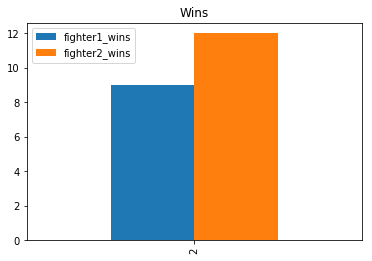

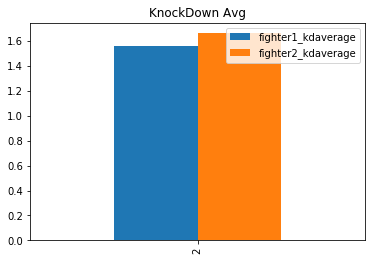

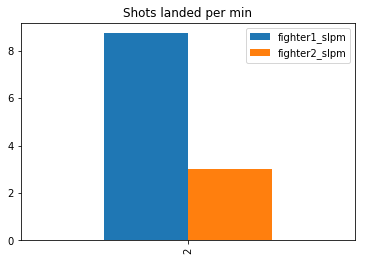

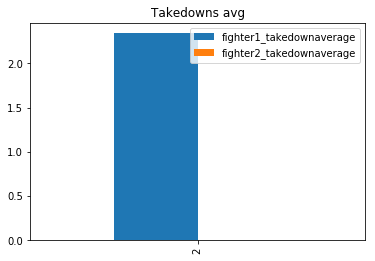

In [72]:
import matplotlib.pyplot as plt

# show wins plot
plt.figure()
plt_df.plot(y=[ 'fighter1_wins', 'fighter2_wins'], kind='bar', title='Wins')
plt.show()

# show knockdown average graph
plt.clf()
plt_df.plot(y=['fighter1_kdaverage', 'fighter2_kdaverage'], kind ='bar', title='KnockDown Avg')
plt.show()

# show shots landed per minute
plt.clf()
plt_df.plot(y=['fighter1_slpm', 'fighter2_slpm'], kind ='bar', title='Shots landed per min')
plt.show()

# show takedowns average
plt.clf()
plt_df.plot(y=['fighter1_takedownaverage', 'fighter2_takedownaverage'], kind='bar', title='Takedowns avg')
plt.show()

In [ ]:
if __name__ == 'main':
    main()

In [29]:
def main():
    # create master dataframe from ufc and fightmetric dataframes
    all_df = join_ufc_fm_dataframes()
    
    # show menu to the user
    while(True):
        if not display_menu(all_df):
            exit(0)
        else:
            pass

In [28]:
# argument df is the pandas dataframe that has joined data from UFC and fightmetric
def display_menu(fighter_df):
    print(MENU_HEADER + '\n' + \
         OPTION_1 + '\n' + \
         OPTION_2 + '\n' + \
         OPTION_3 + '\n' + \
         OPTION_QUIT)
    user_input = input('Please select an option:')
    if user_input.lower() == 'q':
        return False
    elif user_input == 1:
        display_fighter_stats_by_name(fighter_df)
    elif user_input == 2:
        display_top_n_fighters_per_weight_class(fighter_df)
    elif user_input == 3:
        display_upcoming_event_predictions(fighter_df)
    

In [51]:
def display_fighter_stats_by_name(fighter_df):
    fighter_name = input('Please input space separated first and last names of the fighter to display stats\n(e.g. Daniel Cormier, Conor McGregor, Frankie Edgar...)')
    
    # process user input
    first_name = fighter_name.split()[0].lower()
    last_name = fighter_name.split()[1].lower()
    return get_fighter_stats(fighter_df, first_name, last_name)


In [76]:
def join_ufc_fm_dataframes():
    try:
        #Loading Data
        fighter_stats_fm = pd.read_excel('./fighter_stats.xlsx')
        fighter_stats_ufc = pd.read_csv('./fighters.csv', encoding='ISO-8859-1')
        all_df = pd.merge(fighter_stats_fm, fighter_stats_df_dedup, how='left', left_on = ['First', 'Last'], right_on = ['fighter_first_name', 'fighter_last_name'])
        all_df.rename(columns={'Ht.': 'height', 'Wt.': 'weight'}, inplace=True)
        return all_df
    except FileNotFoundError :
        print ('Please check if fighter_stats.xlsx and fighter.csv are present in curr dir')

In [103]:
def display_top_n_fighters_per_weight_class(fighter_df):
    try:
        top_n = int(input('Please select N and we shall display top N fighters in every weight class(0 for all)'))
        if top_n < 0:
            top_n = -top_n
    except ValueError:
        # give default value of 10
        top_n = 10
    
    # display all fighters in weight classes
    for weight_class in WEIGHT_CLASSES:
        fighters_in_weight_class = all_df[all_df['weight'] == weight_class]

        # Rank them by win percentage
        fighters_in_weight_class = fighters_in_weight_class[fighters_in_weight_class.total_fights >= MINIMUM_FIGHTS_TO_HAVE]
        fighters_in_weight_class = fighters_in_weight_class.sort_values(by=['win %', 'total_fights'],ascending=[False, False])
        top_n_fighters = fighters_in_weight_class.loc[:, 
            ['fighter_first_name', 'fighter_last_name', 'total_fights', 'weight','win %']]
        if top_n > 0:
            top_n_fighters = top_n_fighters.head(n=top_n)
        print(top_n_fighters.to_csv(index=False))
        print('==================================================================================================================')

In [104]:
display_top_n_fighters_per_weight_class(all_df)

Please select N and we shall display top N fighters in every weight class(0 for all)-5
fighter_first_name,fighter_last_name,total_fights,weight,win %

fighter_first_name,fighter_last_name,total_fights,weight,win %
Joanna,Jedrzejczyk,15.0,115 lbs.,0.9333333333333332
Viviane,Pereira,14.0,115 lbs.,0.9285714285714286
Alexa,Grasso,11.0,115 lbs.,0.9090909090909092
Polyana,Viana,11.0,115 lbs.,0.9090909090909092
Karolina,Kowalkiewicz,13.0,115 lbs.,0.8461538461538461

fighter_first_name,fighter_last_name,total_fights,weight,win %
Deiveson,Figueiredo,14.0,125 lbs.,1.0
Naoki,Inoue,11.0,125 lbs.,1.0
Magomed,Bibulatov,15.0,125 lbs.,0.9333333333333332
Jarred,Brooks,14.0,125 lbs.,0.9285714285714286
Katlyn,Chookagian,11.0,125 lbs.,0.9090909090909092

fighter_first_name,fighter_last_name,total_fights,weight,win %
Brett,Johns,15.0,135 lbs.,1.0
Manny,Bermudez,12.0,135 lbs.,1.0
Jimmie,Rivera,22.0,135 lbs.,0.9545454545454546
Cody,Stamann,17.0,135 lbs.,0.9411764705882352
Douglas,Silva de Andrade,27.0,135 lb